# Exercises and Homework for week 2

## physics725: Scientific Programming with Python (SS 2025)
Matthias Schott & Thomas Erben

### Group 06-02

Homework is due on **Thursday, 01/05/2025, 11:55pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit your homework. Please ask your tutor if you do not know how to do it. **Please only submit one solution per homework group!**

**Topics of this exercise:**
 * Scalar data types in Python *int*, *float* and *bool*
 * Control structures *if* and *while*
 * Floating poing accuracy
 * Implementation and analysis of simple algorithms

# 1. Lecture review (0 points)

If you did the lecture review questions [04_Lecture_Review.ipynb](04_Lecture_Review.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

# 2. Machine epsilon (5 points)
In class we talked about inaccuracies that occur in a computer when performing operations with floating-point numbers. An important value to quantify floating-point accuracy is the *machine epsilon*. Please have a look at the [Wikipedia article on the machine epsilon](https://en.wikipedia.org/wiki/Machine_epsilon) to learn more about it. 

The *machine epsilon* is defined as the smallest number $\epsilon_m$ such that $1.0 + \epsilon_m > 1.0$. According to the Wikipedia article, the machine epsilon of your programming language can be estimated up to a factor of two with the algorithm:

```
epsilon_m = 1.0;

while (1.0 + 0.5 * epsilon_m) > 1.0:
    epsilon_m = 0.5 * epsilon_m

```
Use this algorithm to determine the *machine epsilon* of the Python-float type. Which float-type is used in Python (see the table of the Wikipedia article)?

In [1]:
epsilon_m = 1.0    # Set initial guess for machine epsilon

### This loop halfs the guess for the machine epsilon until it does not 
###     consider 1.0 + 0.5 * epsilon_m to be greater than 1.0

while (1.0 + 0.5 * epsilon_m) > 1.0:
    epsilon_m *= 0.5

print(epsilon_m)    # Print the resulting estimate

2.220446049250313e-16


According to the Wikipedia article, the float type seems to be double precision, which has a precision of approximately `2.22e-16`.

# 3. Test of natural numbers for the prime property (10 points)

In the following, we want to develop a program to test positive integer numbers for the prime property. A positive integer larger than 1 is a prime if it cannot be formed by multiplying two smaller natural numbers. 

The student Lydia Leibnitz proposes the following algorithm for the task:
1. We are given a natural number $n$ that we want to test
2. In a loop, we test whether `n % m == 0` for all natural numbers $m$ with $2\leq m < \sqrt{n}$
3. If the test (2) is `True` for any of the tested $m$, then $n$ is not prime. Otherwise, we have a prime number.

Lydia gives the following proof for the correctness of her algorithm:
Divisors of $n$ come in pairs and say $n = ab$. Then **exactly one** of the two follwing possibilities can be true:
1. $a < \sqrt{n} \text{ and } b > \sqrt{n}$
2. $a > \sqrt{n} \text{ and } b < \sqrt{n}$

To see this, we assume $a< \sqrt{n} \text{ and } b < \sqrt{n}$. Then follows $n = ab < \sqrt{n}\sqrt{n} < n$ which leads to the contradiction $n<n$. Similarily, we conclude that not both, $a$ and $b$ can be larger than $\sqrt{n}$. It follows that one of the divisors of $n$ must be smaller than $\sqrt{n}$ and we only need to test $2\leq m < \sqrt{n}$ to check whether $n$ is a prime.

Your tasks:
1. Implement Lydias algorithm to test a given number $n$ for the prime property. Your program should report with a text-message, which number is tested and whether it is a prime or not.
2. Test your program with the numbers 8, 105, 177, 51, 5, 47, 199 and 967. Your program should report the last four numbers as primes and the others as non-prime.
3. Embed your test in a loop and consider systematically all numbers $2\leq n \leq 100$ for the prime property. What do you observe?
4. (3.) should show you that your program does not work as expected! Find the underlying algorithmic problem and correct your program! Document within your notebook or script what the problem is!

**Hint:** In the past, many students *did not find any problem* with their implemented algorithm. In that case, your first issue is that you did **not** implement the algorithm described above.

In [2]:
import numpy as np

n = 19    # Number to be tested for primality

m = 2     # Initial value for divisor test

hasDivisor = False

### The following loops over integers at least 2 but small than sqrt(n).
### The loop breaks if a divisor has been found.

while (m < np.sqrt(n)) and not hasDivisor:
    hasDivisor = (n % m == 0)
    m = m + 1

    
if hasDivisor:
    print ("The number {} is not prime.".format(n))
    
else:
    print ("The number {} is prime.".format(n))

The number 19 is prime.


In [3]:
def primeTest (n):
    """ Checks whether the integer n is prime using the suggested algorithm
    """
    
    m = 2     # Initial value for divisor test

    hasDivisor = False
    
    ### The following loops over integers at least 2 but small than sqrt(n).
    ### The loop breaks if a divisor has been found.
    
    while (m < np.sqrt(n)) and not hasDivisor:
        hasDivisor = (n % m == 0)
        m = m + 1
    
        
    if hasDivisor:
        print ("The number {} is not prime.".format(n))
        
    else:
        print ("The number {} is prime.".format(n))

In [4]:
testNums = [8, 105, 177, 51, 5, 47, 199, 967]

for n in testNums:
    primeTest(n)

The number 8 is not prime.
The number 105 is not prime.
The number 177 is not prime.
The number 51 is not prime.
The number 5 is prime.
The number 47 is prime.
The number 199 is prime.
The number 967 is prime.


In [5]:
n = 2

while n < 101:
    primeTest(n)
    n += 1

The number 2 is prime.
The number 3 is prime.
The number 4 is prime.
The number 5 is prime.
The number 6 is not prime.
The number 7 is prime.
The number 8 is not prime.
The number 9 is prime.
The number 10 is not prime.
The number 11 is prime.
The number 12 is not prime.
The number 13 is prime.
The number 14 is not prime.
The number 15 is not prime.
The number 16 is not prime.
The number 17 is prime.
The number 18 is not prime.
The number 19 is prime.
The number 20 is not prime.
The number 21 is not prime.
The number 22 is not prime.
The number 23 is prime.
The number 24 is not prime.
The number 25 is prime.
The number 26 is not prime.
The number 27 is not prime.
The number 28 is not prime.
The number 29 is prime.
The number 30 is not prime.
The number 31 is prime.
The number 32 is not prime.
The number 33 is not prime.
The number 34 is not prime.
The number 35 is not prime.
The number 36 is not prime.
The number 37 is prime.
The number 38 is not prime.
The number 39 is not prime.
The 

The algorithm described above will claim that the squares of primes such as 25 and 49 are prime. This is because the algorithm does not consider the case in which $a = b = \sqrt{n}$. This is fixed by redefining the function as follows.

In [6]:
def primeTest (n):
    """ Checks whether the integer n is prime using the suggested algorithm
    """
    
    m = 2     # Initial value for divisor test

    hasDivisor = False
    
    ### The following loops over integers at least 2 but small than sqrt(n).
    ### The loop breaks if a divisor has been found.
    
    while (m < np.sqrt(n) + 1) and not hasDivisor and not (n==m):
        hasDivisor = (n % m == 0)
        m = m + 1
    
        
    if hasDivisor:
        print ("The number {} is not prime.".format(n))
        
    else:
        print ("The number {} is prime.".format(n))

In [7]:
primeTest(25)
primeTest(2)

The number 25 is not prime.
The number 2 is prime.


# 4. Problems with an integral series (15 points)

Consider the sequence
$$
I_n=\int_0^1 \frac{x^{n}}{x+10}\,\mathrm{d}x; \qquad n=1,2,\dots
$$
We observe that

\begin{equation}
I_n + 10I_{n-1} = \int_0^1 \frac{x^{n}+10x^{n-1}}{x+10}\,\mathrm{d}x =
\int_0^1 x^{n-1}\,\mathrm{d}x = \frac 1n \label{eq1}\tag{1}.
\end{equation}

This allows us to obtain $I_n$ with the following recurrence relation: 

\begin{equation}
I_n = \frac 1n - 10I_{n-1} \text{ with } 
I_0 = \int_0^1 \frac{1}{x+10}\,\mathrm{d}x = \ln(11/10)\approx 0.09531. \label{eq2}\tag{2}
\end{equation}

One can show that the whole sequence converges to zero: $\lim_{n\to\infty}I_n=0$. 

We want to numerically estimate $I_{20}$ by using eqs. \ref{eq1} and \ref{eq2} and we will calculate and print the first 20 elements of the series in a `while`-loop. 

There is a second, independent estimate of $I_{20}$ if we revert the first relation from eq. \ref{eq2}:
\begin{equation}
  I_{n-1} = \frac 1{10}\left(\frac 1n -I_{n}\right) \text{ with } I_{50} = 0.\label{eq3}\tag{3}
\end{equation}
This relation allows us to estimate $I_{50}, I_{49}, \dots, I_{20}$.

**Your tasks:**

Perform the two experiments with the forward and with the reverse relation and argue which one of the results you trust. Please explain your observations.

**Hints:** 
 * Assume for the first case (forward relation) that $I_0$ is represented internally as a float number with an error, i.e. $I_0 = \ln(11/10) + \epsilon$, where $\epsilon$ is the error. We know that $\epsilon\approx 10^{-18}$ for `Python` float numbers. What happens with $\epsilon$ when you calculate new elements of the series? 
 * for the logarithm you can use the numpy module with ```import numpy``` and use the defined function ```numpy.log(x)``` to obtain $\ln(x)$!

In [8]:
# Your solution with the forward relation from eq. (2)

In = np.log(11/10)    # Set initial value
n = 1                 # Set counter

while n < 21:         # The loop ends when the 20-th term in the sequence has been computed
    In = 1/n - 10.*In   # Compute I[n] from I[n-1] according to eq. (2)
    n += 1

print(In)

7483.468021084803


In [9]:
# Your solution with the reverse relation from eq. (3)

In = 0      # Set value for I_50

n = 50      # Set counter

while n > 20:     # Loop ends as I_20 is computed
    In = 0.1 * (1/n - In)  # Computes I[n-1] from I[n] according to eq. (3)

    #  print(n-1, In)
    
    n -= 1

print(In)

0.004347035818028109


The result using the forward algorithm is nonsensical as it is larger than 1. The reason why this happens is that the error becomes 10 times larger in each step for the forward estimate, whereas for the backward estimate, the error shrinks by a factor of 10 in each iteration. After the 20th iteration the error in $I_{20}$ is already of order $10^4$, assuming the error for $I_0$ is of order $10^{-16}$.

# 5. Another numerical estimate for the square-root of a positive number (20 points)

in class, I showed you an algorithm to estimate the square root of a number. Here is another one:

*We want to estimate the square root of a positive number $x$. We start with an arbitrary number $y_0>0$ and calculate the sequence $y_{n+1}=\frac 12\left(y_n+\frac{x}{y_n}\right)$. The sequence converges to $\sqrt{x}$, i.e. $\lim_{n\to\infty}y_n=\sqrt{x}$*.

Your tasks:

1. Implement the algorithm in a Python-program. Start with $y_0=1$ and calculate the $y_i$ in a `while`-loop. Finish the loop when $|y_{n+1}-y_n| < \epsilon$ with $\epsilon=10^{-6}$. Consider $y_{n+1}$ as your estimate for $\sqrt{x}$ and print $y_{n+1}$ and $y_{n+1}^2$ (the latter is a test for your estimate!).

    **Hint:**

    A function to obtain the absolute value of a float-number is `numpy.fabs`.


In [10]:
import sys

def sqrt (x, eps = 1.e-6, N = 10000):

    y = 1.        # Sets initial estimate
    y_prev = 0    # Records previous value


    n = 0         # Iteration counter set to 0

    while np.fabs(y - y_prev) > eps and n<N:
        y_prev = y             # Previous value updated
        y = 0.5 * (y + x/y)    # Computes next estimate

        n += 1

    if n == N:
        print("Exceeded maximum number of iterations.", file=sys.stderr)    # In case maximum number of iterations is exceeded, quit
        return None
    
    return y


2. Test your program with $x\in \{2, 5, 11, 49, 111, 225\}$ and verify that the estimated square roots meet your expectations.


In [11]:
testInputs = [2, 5, 11, 49, 111, 225]       # List of test numbers

for x in testInputs:
    sqrt_est = sqrt(x)
    testVal = sqrt_est**2
    print ("Test input: {}\t Square root estimate: {:.12f}\t Square of estimate: {:.12f}".format(x, sqrt_est, testVal))

Test input: 2	 Square root estimate: 1.414213562373	 Square of estimate: 2.000000000000
Test input: 5	 Square root estimate: 2.236067977500	 Square of estimate: 5.000000000001
Test input: 11	 Square root estimate: 3.316624790355	 Square of estimate: 11.000000000000
Test input: 49	 Square root estimate: 7.000000000000	 Square of estimate: 49.000000000000
Test input: 111	 Square root estimate: 10.535653752853	 Square of estimate: 111.000000000000
Test input: 225	 Square root estimate: 15.000000000000	 Square of estimate: 225.000000000000


The estimate of the square root given by the algorithm above is within $10^{-12}$ of the expected square root, and its square is also close to the input value.


3. If we have available several algorithms for the same task, we would like to learn about the strengths and weaknesses of each (accuracy, reliability, robustness, performance). We would like to compare the lecture algorithm to the new one and verify whether one can estimate the square root more efficiently (with less iterations) than the other.

    1. Run both algorithms to estimate square roots of different numbers up to a given accuracy $\epsilon$ as defined in the algorithms. Print the number of iterations that each algorithm needs to reach the required $\epsilon$. Please repeat the exercise for several values of $\epsilon$. What do you observe?


In [12]:
### In this cell we redefine the functions that estimate the square root to print the number of iterations, along with the estimate. 

def class_sqrt_it(x, eps, N = 10000):
    """
    estimate the square root of x up to a given
    accuracy eps (with number of iterations)
    """
    a = 0.
    b = x
    middle = (a + b) / 2.
    
    n = 0
    while (b - a) > eps and n < 1000:
        if (middle**2) < x:
            a = (a + b) / 2.
        else:
            b = (a + b) / 2.

        middle = (a + b) / 2.
        n = n + 1

    if n == N:
        print("Exceeded maximum number of iterations.", file=sys.stderr)
        return None

    return middle, n

def sqrt_it (x, eps = 1.e-6, N = 10000):

    y = 1.        # Sets initial estimate
    y_prev = 0    # Records previous value


    n = 0         # Iteration counter set to 0

    while np.fabs(y - y_prev) > eps and n<N:
        y_prev = y             # Previous value updated
        y = 0.5 * (y + x/y)    # Computes next estimate

        n += 1

    if n == N:
        print("Exceeded maximum number of iterations.", file=sys.stderr)    # In case maximum number of iterations is exceeded, quit
        return None
    
    return y, n

In [13]:
x = 125.
epss = [10.0**(-n) for n in range(1,15)]

HW_alg_its = []
class_alg_its = []

for eps in epss:
    HW_alg_its += [sqrt_it(x, eps)[1]]
    class_alg_its += [class_sqrt_it(x, eps)[1]]


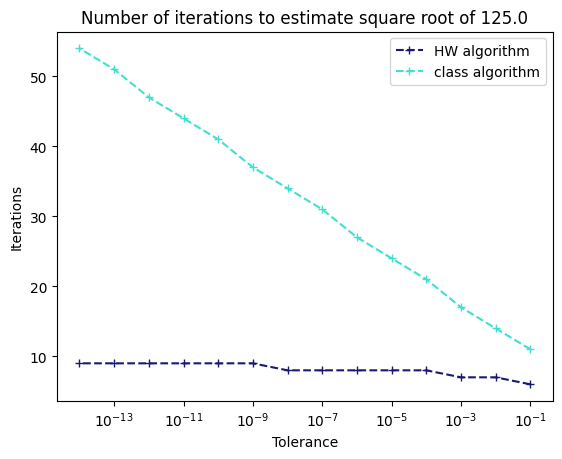

In [14]:
import matplotlib.pyplot as plt

plt.semilogx(epss, HW_alg_its, color='midnightblue', label='HW algorithm', marker="+", ls='--')
plt.semilogx(epss, class_alg_its, color='turquoise', label='class algorithm', marker="+", ls='--')

plt.xlabel('Tolerance')
plt.ylabel('Iterations')
plt.title('Number of iterations to estimate square root of {}'.format(x))
plt.legend()

plt.show()

In [15]:
### We now redo this for the test inputs above

big_HW_its = []
big_class_its = []

for x in testInputs:

    HW_alg_its = []
    class_alg_its = []

    for eps in epss:
        HW_alg_its += [sqrt_it(x, eps)[1]]
        class_alg_its += [class_sqrt_it(x, eps)[1]]

    big_HW_its += [HW_alg_its]
    big_class_its += [class_alg_its]

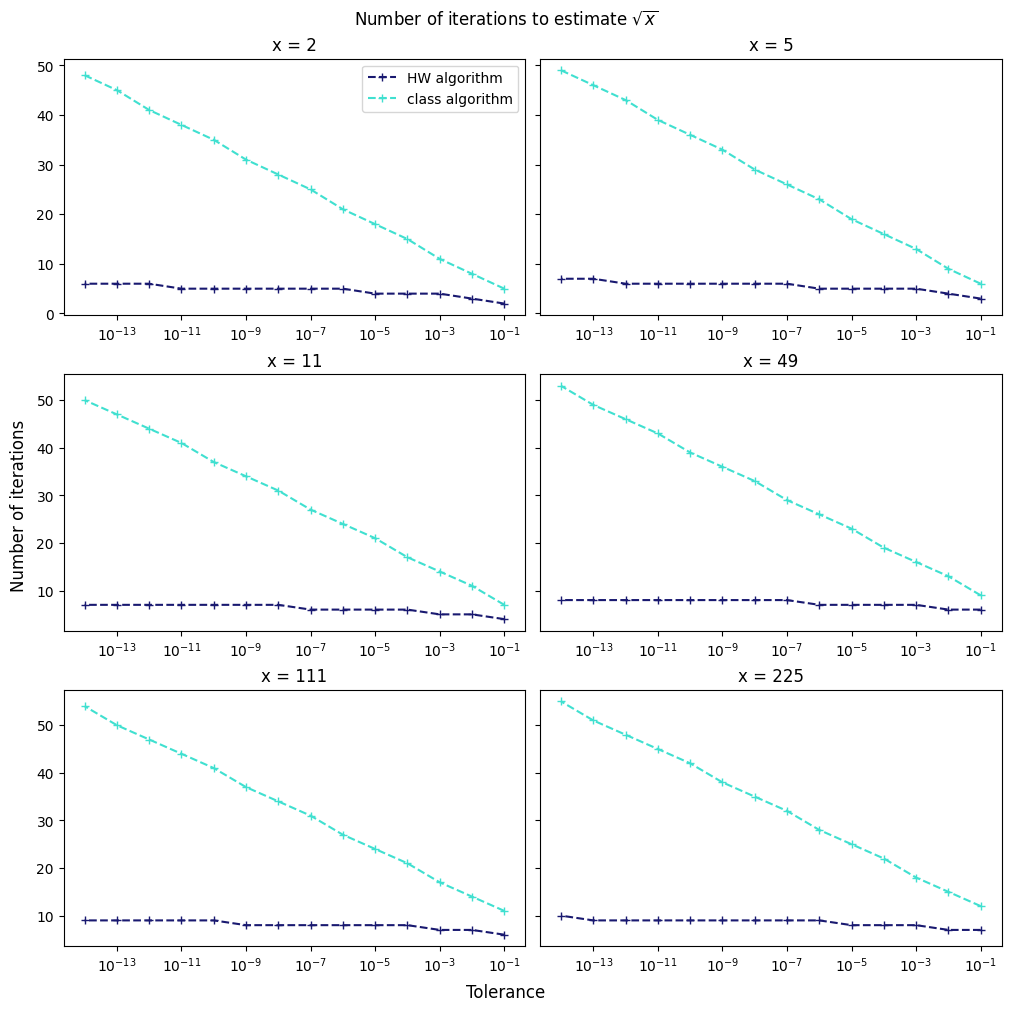

In [16]:
fig, ax = plt.subplots(3,2, figsize=(10,10), sharey='row', layout='constrained')
ax = ax.reshape(-1)

for n, x in enumerate(testInputs):
    ax[n].semilogx(epss, big_HW_its[n], color='midnightblue', label='HW algorithm', marker="+", ls='--')
    ax[n].semilogx(epss, big_class_its[n], color='turquoise', label='class algorithm', marker="+", ls='--')
    
    # ax[n].xlabel('Tolerance')
    # ax[n].ylabel('Iterations')
    ax[n].title.set_text('x = {}'.format(x))
    # ax[n].legend()

    if n==0:
        ax[n].legend()
    
fig.supylabel('Number of iterations')
fig.supxlabel('Tolerance')
fig.suptitle(r'Number of iterations to estimate $\sqrt{x}$')

plt.show()

3. 
     2. Modify your codes to print in each iteration $n$ of the square-root estimation:
          1. The values $\epsilon_{n}$ and $\epsilon_{n} / \epsilon_{n-1}$ for the lecture algorithm. $\epsilon_{n}$ is the estimate of $\epsilon$ for iteration $n$ and  $\epsilon_{n-1}$ the corresponding value for iteration $n-1$.
          2. The values $\epsilon_{n}$ and $\epsilon_{n} / \epsilon_{n-1}^{2}$ for the homework algorithm.
     3. Describe your observations of 3(A) and 3(B). What do they mean for the convergence speed of the two algorithms.

In [17]:
### In this cell we redefine the functions that estimate the square root to print the number of iterations, along with the estimate. 

def class_sqrt_error(x, eps = 1.e-10, N = 10000):
    """
    estimate the square root of x up to a given
    accuracy eps (with number of iterations)
    """
    a = 0.
    b = x
    middle = (a + b) / 2.

    y_prev = 0      # Records value at previous iteration
    err_prev = 1    # Records error at previous iteration; set initially at 1 to avoid div. by zero
    
    n = 0
    while (b - a) > eps and n < 1000:
        y_prev = middle
        
        if (middle**2) < x:
            a = (a + b) / 2.
        else:
            b = (a + b) / 2.

        middle = (a + b) / 2.
        n = n + 1

        err = np.abs(middle - y_prev)   # Computes the error

        print ('Iteration: {} \t Error est.: {} \t Ratio of it. error: {}'.format(n, err, err/err_prev))

        err_prev = err    # Saves error for comparison in next iteration

    if n == N:
        print("Exceeded maximum number of iterations.", file=sys.stderr)
        return None

    return middle

def sqrt_error (x, eps = 1.e-10, N = 10000):

    y = 1.        # Sets initial estimate
    y_prev = 0    # Records previous value

    err_prev = 1  # Records previous error; set initially at 1 to avoid div. by zero


    n = 0         # Iteration counter set to 0

    while np.fabs(y - y_prev) > eps and n<N:
        y_prev = y             # Previous value updated
        y = 0.5 * (y + x/y)    # Computes next estimate

        err = np.abs(y - y_prev)    # Computes the error

        n += 1

        print ('Iteration: {} \t Error est.: {} \t Ratio of it. error: {}'.format(n, err, err/(err_prev)))

        err_prev = err   # Saves current error for comparison in next iteration

    if n == N:
        print("Exceeded maximum number of iterations.", file=sys.stderr)    # In case maximum number of iterations is exceeded, quit
        return None
    
    return y

In [18]:
sqrt_error(225)

Iteration: 1 	 Error est.: 112.0 	 Ratio of it. error: 112.0
Iteration: 2 	 Error est.: 55.50442477876106 	 Ratio of it. error: 0.49557522123893805
Iteration: 3 	 Error est.: 26.79111530032241 	 Ratio of it. error: 0.48268431583807914
Iteration: 4 	 Error est.: 11.688267126076585 	 Ratio of it. error: 0.4362740033422918
Iteration: 5 	 Error est.: 3.5920856999197355 	 Ratio of it. error: 0.3073240593471528
Iteration: 6 	 Error est.: 0.41827639020405094 	 Ratio of it. error: 0.11644387833324724
Iteration: 7 	 Error est.: 0.005829571919239385 	 Ratio of it. error: 0.013937128787966015
Iteration: 8 	 Error est.: 1.1327968731933424e-06 	 Ratio of it. error: 0.00019431904930356268
Iteration: 9 	 Error est.: 4.263256414560601e-14 	 Ratio of it. error: 3.763478268211075e-08


15.0

In [19]:
class_sqrt_error(225)

Iteration: 1 	 Error est.: 56.25 	 Ratio of it. error: 56.25
Iteration: 2 	 Error est.: 28.125 	 Ratio of it. error: 0.5
Iteration: 3 	 Error est.: 14.0625 	 Ratio of it. error: 0.5
Iteration: 4 	 Error est.: 7.03125 	 Ratio of it. error: 0.5
Iteration: 5 	 Error est.: 3.515625 	 Ratio of it. error: 0.5
Iteration: 6 	 Error est.: 1.7578125 	 Ratio of it. error: 0.5
Iteration: 7 	 Error est.: 0.87890625 	 Ratio of it. error: 0.5
Iteration: 8 	 Error est.: 0.439453125 	 Ratio of it. error: 0.5
Iteration: 9 	 Error est.: 0.2197265625 	 Ratio of it. error: 0.5
Iteration: 10 	 Error est.: 0.10986328125 	 Ratio of it. error: 0.5
Iteration: 11 	 Error est.: 0.054931640625 	 Ratio of it. error: 0.5
Iteration: 12 	 Error est.: 0.0274658203125 	 Ratio of it. error: 0.5
Iteration: 13 	 Error est.: 0.01373291015625 	 Ratio of it. error: 0.5
Iteration: 14 	 Error est.: 0.006866455078125 	 Ratio of it. error: 0.5
Iteration: 15 	 Error est.: 0.0034332275390625 	 Ratio of it. error: 0.5
Iteration: 16 

15.000000000011937

For the algorithm introduced in class, the estimate for the error is always equal to one half, whereas for the algorithm we consider here, the error changes from iteration to the next but is significantly smaller. This translates to the latter converging much faster, i.e. after fewer iterations.